In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import json
import pickle

## read file 

In [3]:
df_train= pd.read_csv("../input/train_ver2.csv",
                     na_values=[" NA", "     NA"])
df_test = pd.read_csv("../input/test_ver2.csv",
                     na_values='         NA')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
with open('./col_dtype.json') as f:
    coltypes = json.load(f)

In [5]:
df_train = df_train.astype(coltypes["train"])
df_test = df_test.astype(coltypes["test"])

## check data

In [5]:
pd.set_option('display.max_columns', 100)

In [6]:
df_train.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35.0,2015-01-12,0.0,6.0,1.0,NaN,1,A,S,N,NaN,KHL,N,1.0,29.0,MALAGA,1.0,inf,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23.0,2012-08-10,0.0,35.0,1.0,NaN,1,I,S,S,NaN,KHE,N,1.0,13.0,CIUDAD REAL,0.0,35552.0,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23.0,2012-08-10,0.0,35.0,1.0,NaN,1,I,S,N,NaN,KHE,N,1.0,13.0,CIUDAD REAL,0.0,inf,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22.0,2012-08-10,0.0,35.0,1.0,NaN,1,I,S,N,NaN,KHD,N,1.0,50.0,ZARAGOZA,0.0,inf,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23.0,2012-08-10,0.0,35.0,1.0,NaN,1,A,S,N,NaN,KHE,N,1.0,50.0,ZARAGOZA,1.0,NaN,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0


In [7]:
df_test.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento
0,2016-06-28,15889,F,ES,V,56.0,1995-01-16,0.0,256.0,1.0,NaN,1,A,S,N,N,KAT,N,1.0,28.0,MADRID,1.0,inf,01 - TOP
1,2016-06-28,1170544,N,ES,H,36.0,2013-08-28,0.0,34.0,1.0,NaN,1,I,S,N,NaN,KAT,N,1.0,3.0,ALICANTE,0.0,NaN,02 - PARTICULARES
2,2016-06-28,1170545,N,ES,V,22.0,2013-08-28,0.0,34.0,1.0,NaN,1,A,S,N,NaN,KHE,N,1.0,15.0,"CORUÑA, A",1.0,NaN,03 - UNIVERSITARIO
3,2016-06-28,1170547,N,ES,H,22.0,2013-08-28,0.0,34.0,1.0,NaN,1,I,S,N,NaN,KHE,N,1.0,8.0,BARCELONA,0.0,inf,03 - UNIVERSITARIO
4,2016-06-28,1170548,N,ES,H,22.0,2013-08-28,0.0,34.0,1.0,NaN,1,I,S,N,NaN,KHE,N,1.0,7.0,"BALEARS, ILLES",0.0,inf,03 - UNIVERSITARIO


In [8]:
df_train.shape

(13647309, 48)

In [9]:
df_test.shape

(929615, 24)

- 0〜23 列はtrain/testで共通。
- trainデータの24〜48がレコメンドするアイテム。

### 要約統計量の確認

In [10]:
df_train.describe()

,ncodpers,age,ind_nuevo,antiguedad,indrel,tipodom,cod_prov,ind_actividad_cliente,renta,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
count,1.364731e+07,13619575.0,13619575.0,13619575.0,13619575.0,13619574.0,13553718.0,13619575.0,10852934.0,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,1.364731e+07,13631246.0,13631246.0,1.364731e+07
mean,8.349042e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.022912e-04,2.315475e-05,6.554837e-01,3.939238e-04,8.086722e-02,9.474175e-03,9.726606e-03,1.290083e-01,4.330583e-02,1.778739e-03,1.660987e-03,4.296679e-02,8.274357e-02,1.848599e-02,5.886582e-03,9.170965e-03,2.627404e-03,5.253636e-02,4.438868e-02,2.560761e-02,3.847718e-03,NaN,NaN,1.279162e-01
std,4.315650e+05,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,1.011340e-02,4.811883e-03,4.752103e-01,1.984361e-02,2.726311e-01,9.687320e-02,9.814275e-02,3.352091e-01,2.035447e-01,4.213757e-02,4.072135e-02,2.027823e-01,2.754942e-01,1.347006e-01,7.649791e-02,9.532502e-02,5.119083e-02,2.231060e-01,2.059571e-01,1.579616e-01,6.191053e-02,0.0,0.0,3.339965e-01
min,1.588900e+04,2.0,0.0,-inf,1.0,1.0,1.0,0.0,1203.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00
25%,4.528130e+05,24.0,0.0,23.0,1.0,1.0,15.0,0.0,inf,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00
50%,9.318930e+05,39.0,0.0,50.0,1.0,1.0,28.0,0.0,inf,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00
75%,1.199286e+06,50.0,0.0,135.0,1.0,1.0,35.0,1.0,inf,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00
max,1.553689e+06,164.0,1.0,256.0,99.0,1.0,52.0,1.0,inf,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.0,1.0,1.000000e+00


In [11]:
df_train.describe(exclude="number")

,fecha_dato,ind_empleado,pais_residencia,sexo,fecha_alta,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,nomprov,segmento
count,13647309,13619575,13619575,13619505,13619575,24793,13497528.0,13497528,13619575,13619575,1808,13461183,13619575,13553718,13457941
unique,17,5,118,2,6756,223,13.0,5,2,2,2,162,2,52,3
top,2016-05-28,N,ES,V,2014-07-28,2015-12-24,1.0,I,S,N,N,KHE,N,MADRID,02 - PARTICULARES
freq,931453,13610977,13553710,7424252,57389,763,7277607.0,7304875,13553711,12974839,1791,4055270,13584813,4409600,7960220


In [12]:
df_test.describe()

,ncodpers,age,ind_nuevo,antiguedad,indrel,tipodom,cod_prov,ind_actividad_cliente,renta
count,9.296150e+05,929615.0,929615.0,929615.0,929615.0,929615.0,925619.0,929615.0,701650.0
mean,8.794566e+05,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
std,4.481569e+05,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN
min,1.588900e+04,2.0,0.0,-inf,1.0,1.0,1.0,0.0,1203.0
25%,4.833615e+05,25.0,0.0,23.0,1.0,1.0,15.0,0.0,inf
50%,9.664250e+05,39.0,0.0,55.0,1.0,1.0,28.0,0.0,inf
75%,1.264316e+06,51.0,0.0,136.0,1.0,1.0,35.0,1.0,inf
max,1.553689e+06,164.0,1.0,257.0,99.0,1.0,52.0,1.0,inf


In [13]:
df_test.describe(exclude="number")

,fecha_dato,ind_empleado,pais_residencia,sexo,fecha_alta,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,nomprov,segmento
count,929615,929615,929615,929610,929615,1683,929592.0,929592,929615,929615,104,927534,929615,925619,927367
unique,1,5,118,2,6750,21,2.0,3,2,2,2,162,2,52,3
top,2016-06-28,N,ES,V,2014-07-28,2016-06-01,1.0,I,S,N,N,KHE,N,MADRID,02 - PARTICULARES
freq,929615,929096,925619,504515,3421,138,929565.0,535943,925620,883548,103,251665,927215,298250,545378


- trainのage, antiguedad（5,8 列）、testのrenta(22列)は数値データにも関わらず、数値データとして認識されていないよう。
- ⇒　astype関数を使って原因を調べたところ、NAが空白つきのNA（'         NA'や' NA'）で読み込まれているよう。本質的な原因は不明だが、pd.read_csvでna_valuesを指定することで回避。

### 欠損の確認(全レコードに対する欠損の割合)

In [14]:
df_train.isnull().sum()/df_train.shape[0]*100

fecha_dato                0.000000
ncodpers                  0.000000
ind_empleado              0.203220
pais_residencia           0.203220
sexo                      0.203732
age                       0.203220
fecha_alta                0.203220
ind_nuevo                 0.203220
antiguedad                0.203220
indrel                    0.203220
ult_fec_cli_1t           99.818330
indrel_1mes               1.097513
tiprel_1mes               1.097513
indresi                   0.203220
indext                    0.203220
conyuemp                 99.986752
canal_entrada             1.363829
indfall                   0.203220
tipodom                   0.203227
cod_prov                  0.685784
nomprov                   0.685784
ind_actividad_cliente     0.203220
renta                    20.475648
segmento                  1.387585
ind_ahor_fin_ult1         0.000000
ind_aval_fin_ult1         0.000000
ind_cco_fin_ult1          0.000000
ind_cder_fin_ult1         0.000000
ind_cno_fin_ult1    

In [15]:
df_test.isnull().sum()/df_test.shape[0]*100

fecha_dato                0.000000
ncodpers                  0.000000
ind_empleado              0.000000
pais_residencia           0.000000
sexo                      0.000538
age                       0.000000
fecha_alta                0.000000
ind_nuevo                 0.000000
antiguedad                0.000000
indrel                    0.000000
ult_fec_cli_1t           99.818957
indrel_1mes               0.002474
tiprel_1mes               0.002474
indresi                   0.000000
indext                    0.000000
conyuemp                 99.988813
canal_entrada             0.223856
indfall                   0.000000
tipodom                   0.000000
cod_prov                  0.429855
nomprov                   0.429855
ind_actividad_cliente     0.000000
renta                    24.522517
segmento                  0.241821
dtype: float64

### ユニークユーザー数

In [16]:
print('train: ', len(df_train['ncodpers'].unique()))
print('test: ', len(df_test['ncodpers'].unique()))

train:  956645
test:  929615


In [17]:
print('test ∩ train:', len(set(df_test['ncodpers']) & set(df_train['ncodpers'])))

test ∩ train: 929615


## visualization

### trainは間引いて可視化する

In [18]:
df_train_subset = df_train.sample(frac=0.05)

### ind_empleado | Employee index: A active, B ex employed, F filial, N not employee, P pasive

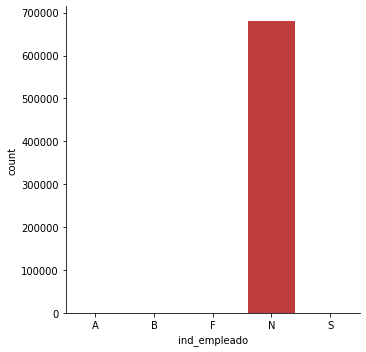

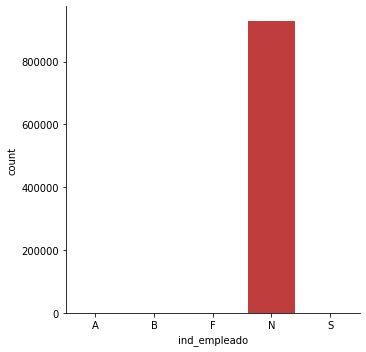

In [19]:
sns.catplot(data=df_train_subset, x='ind_empleado', kind='count', order=['A', 'B', 'F', 'N', 'S'])
sns.catplot(data=df_test, x='ind_empleado', kind='count', order=['A', 'B', 'F', 'N', 'S'])

- train/ testともにほとんど'N' (Not employee)

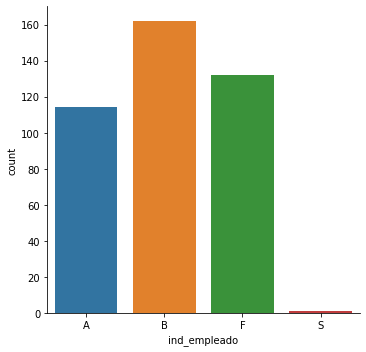

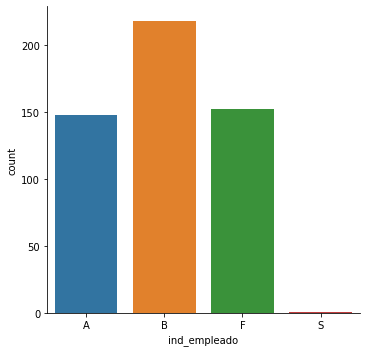

In [20]:
sns.catplot(data=df_train_subset.query("ind_empleado != 'N'"), x='ind_empleado', kind='count', order=['A', 'B', 'F', 'S'])
sns.catplot(data=df_test.query("ind_empleado != 'N'"), x='ind_empleado', kind='count', order=['A', 'B', 'F', 'S'])

- 分布はtrain/testで同等

### pais residencia | Customer's Country residence

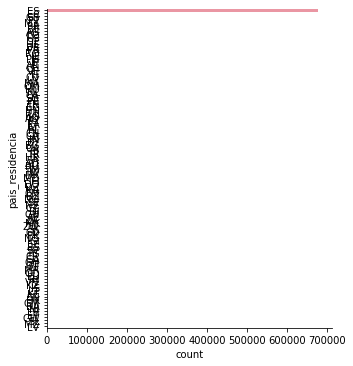

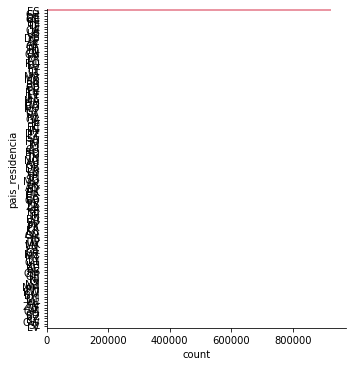

In [21]:
sns.catplot(data=df_train_subset, y='pais_residencia', kind='count')
sns.catplot(data=df_test, y='pais_residencia', kind='count')

- カテゴリが多すぎてよくわからない。

In [22]:
print(df_train['pais_residencia'].value_counts())
print(df_test['pais_residencia'].value_counts())

ES    13553710
FR        5161
AR        4835
DE        4625
GB        4605
        ...   
ZW          11
DJ          11
JM          11
BM           6
MT           2
Name: pais_residencia, Length: 118, dtype: int64
ES    925619
FR       311
AR       288
GB       286
DE       281
       ...  
DJ         1
GE         1
BZ         1
BM         1
KW         1
Name: pais_residencia, Length: 118, dtype: int64


- 度数が少ない国が存在。"other"などで統合したほうが良いカテゴリがある。

### sexo| Customer's sex

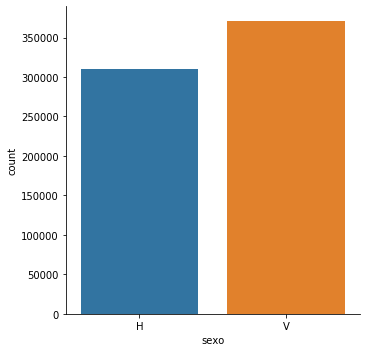

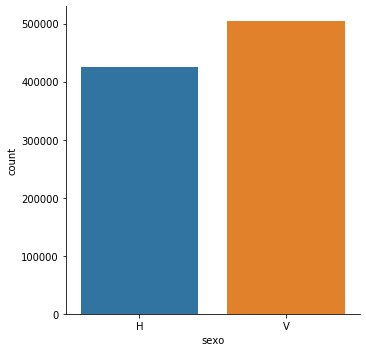

In [23]:
sns.catplot(data=df_train_subset, x='sexo', kind='count', order=['H', 'V'])
sns.catplot(data=df_test, x='sexo', kind='count', order=['H', 'V'])

### age

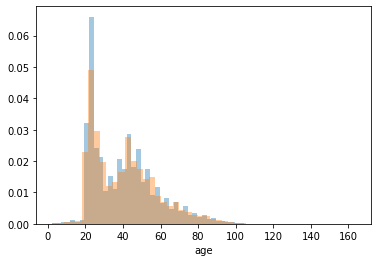

In [24]:
sns.distplot(a=df_train_subset['age'].dropna(), kde=False, norm_hist=True)
sns.distplot(a=df_test['age'].dropna(), kde=False, norm_hist=True)

- 分布に偏りなし
- 100歳以上、10歳以下など誤りがありそう。

### ind_neuvo | New customer Index. 1 if the customer registered in the last 6 months.

0.0    12808368
1.0      811207
Name: ind_nuevo, dtype: int64
0.0    903726
1.0     25889
Name: ind_nuevo, dtype: int64


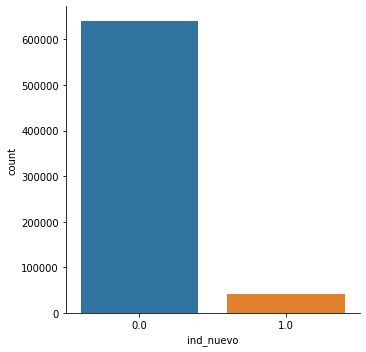

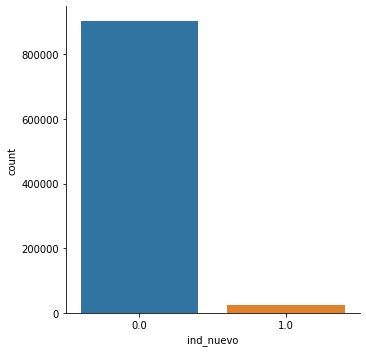

In [25]:
print(df_train['ind_nuevo'].value_counts())
print(df_test['ind_nuevo'].value_counts())
sns.catplot(data=df_train_subset, x='ind_nuevo', kind='count')
sns.catplot(data=df_test, x='ind_nuevo', kind='count')

### antiguedad | Customer seniority (in months)

In [26]:
print(df_train['antiguedad'].value_counts())
print(df_test['antiguedad'].value_counts())

 12.0     243160
 21.0     214795
 10.0     206165
 9.0      177957
 23.0     177839
           ...  
 253.0       416
 254.0       261
 255.0       179
 256.0       102
-inf          38
Name: antiguedad, Length: 258, dtype: int64
 8.0      26335
 32.0     23415
 9.0      22972
 20.0     21108
 11.0     20420
          ...  
 0.0        129
 257.0      102
 255.0       84
 256.0       77
-inf          3
Name: antiguedad, Length: 259, dtype: int64


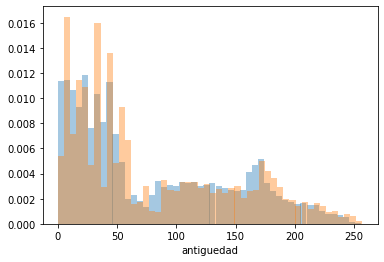

In [27]:
sns.distplot(a=df_train_subset['antiguedad'].replace(-np.inf, np.nan).dropna(), kde=False, norm_hist=True)
sns.distplot(a=df_test['antiguedad'].replace(-np.inf, np.nan).dropna(), kde=False, norm_hist=True)

- seniorityの意味ががよくわからない。
- 150から200あたりがtest/trainで若干不均衡。

### indrel | 1 (First/Primary), 99 (Primary customer during the month but not at the end of the month)

1.0     13594782
99.0       24793
Name: indrel, dtype: int64
1.0     927932
99.0      1683
Name: indrel, dtype: int64


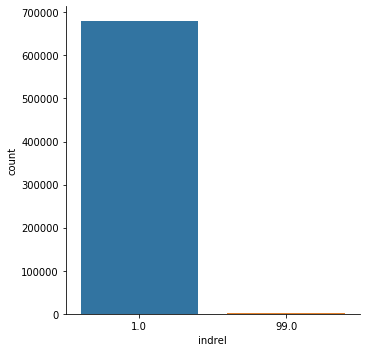

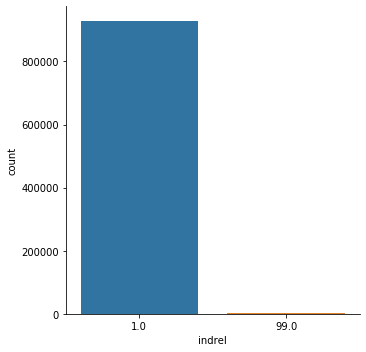

In [28]:
print(df_train['indrel'].value_counts())
print(df_test['indrel'].value_counts())
sns.catplot(data=df_train_subset, x='indrel', kind='count')
sns.catplot(data=df_test, x='indrel', kind='count')

- 変数の意味がよくわからない。

### indrel_1mes | Customer type at the beginning of the month ,1 (First/Primary customer), 2 (co-owner ),P (Potential),3 (former primary), 4(former co-owner)

1.0    7277607
1.0    4017746
1      2195328
3.0       1804
3.0       1409
3         1137
P          874
2          483
2.0        479
2.0        355
4.0        143
4.0         93
4           70
Name: indrel_1mes, dtype: int64
1.0    929565
3.0        27
Name: indrel_1mes, dtype: int64


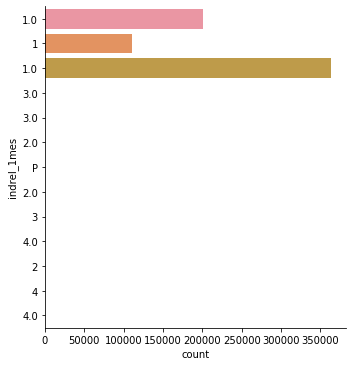

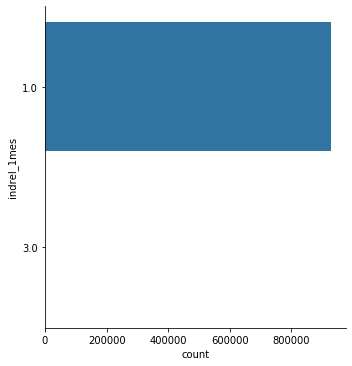

In [30]:
print(df_train['indrel_1mes'].value_counts())
print(df_test['indrel_1mes'].value_counts())
sns.catplot(data=df_train_subset, y='indrel_1mes', kind='count')
sns.catplot(data=df_test, y='indrel_1mes', kind='count')

- 1/1.0 など表記ゆれがある。

### tiprel_1mes | Customer relation type at the beginning of the month, A (active), I (inactive), P (former customer),R (Potential)

I    7304875
A    6187123
P       4656
R        870
N          4
Name: tiprel_1mes, dtype: int64
I    535943
A    393622
P        27
Name: tiprel_1mes, dtype: int64


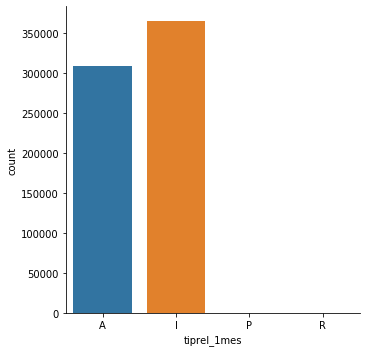

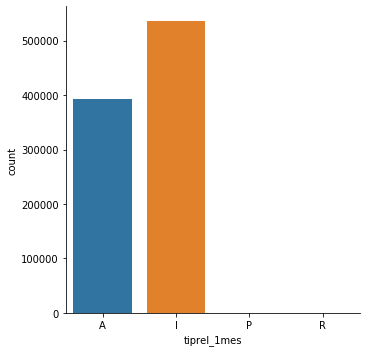

In [33]:
print(df_train['tiprel_1mes'].value_counts())
print(df_test['tiprel_1mes'].value_counts())
sns.catplot(data=df_train_subset, x='tiprel_1mes', kind='count', order=['A', 'I', 'P', 'R'])
sns.catplot(data=df_test, x='tiprel_1mes', kind='count', order=['A', 'I', 'P', 'R'])

- testに'R'はいない。
- trainに'N'という、説明にないカテゴリがある。

### indresi | Residence index (S (Yes) or N (No) if the residence country is the same than the bank country)

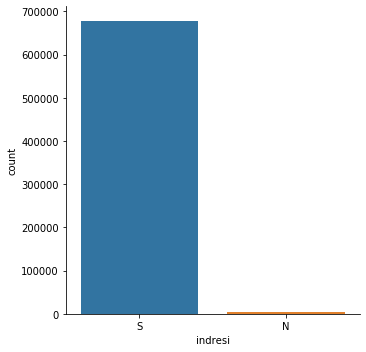

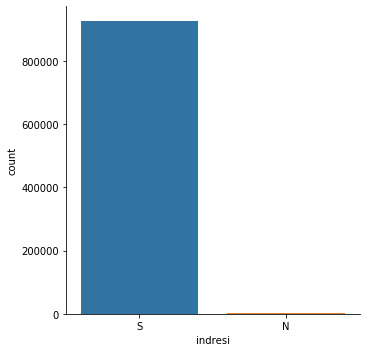

In [32]:
sns.catplot(data=df_train_subset, x='indresi', kind='count')
sns.catplot(data=df_test, x='indresi', kind='count')

### conyuemp | Spouse index. 1 if the customer is spouse of an employee

In [34]:
print(df_train['conyuemp'].value_counts())
print(df_test['conyuemp'].value_counts())

N    1791
S      17
Name: conyuemp, dtype: int64
N    103
S      1
Name: conyuemp, dtype: int64


- 説明とこなりカテゴリ値はN/S。ほぼNA

### canal_entrada | channel used by the customer to join

In [35]:
print(df_train['canal_entrada'].value_counts())
print(df_test['canal_entrada'].value_counts())

KHE    4055270
KAT    3268209
KFC    3098360
KHQ     591039
KFA     409669
        ...   
KGN         17
025         11
KDL         11
KHS          5
KHR          1
Name: canal_entrada, Length: 162, dtype: int64
KHE    251665
KAT    205833
KFC    200697
KHQ     74969
KHM     33384
        ...  
KDL         1
KDI         1
KHR         1
KDB         1
025         1
Name: canal_entrada, Length: 162, dtype: int64


- 何の略であろう？
- 頻度がすくないカテゴリがあるので、統合したほうが良いかも。

### indfall | Deceased index. N/S

N    13584813
S       34762
Name: indfall, dtype: int64
N    927215
S      2400
Name: indfall, dtype: int64


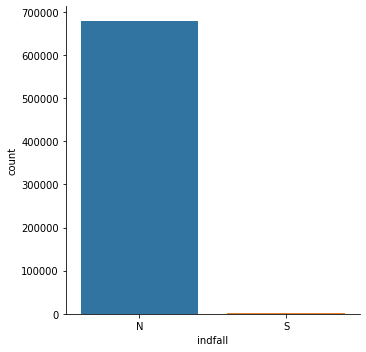

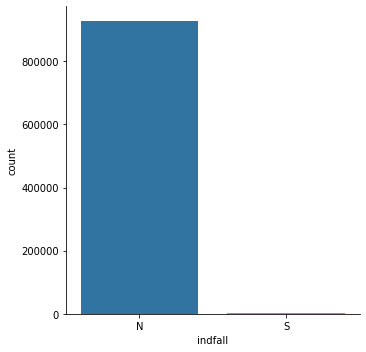

In [53]:
print(df_train['indfall'].value_counts())
print(df_test['indfall'].value_counts())
sns.catplot(data=df_train_subset, x='indfall', kind='count')
sns.catplot(data=df_test, x='indfall', kind='count')

### tipodom | Addres type. 1, primary address

In [39]:
print(df_train['tipodom'].value_counts())
print(df_test['tipodom'].value_counts())

1.0    13619574
Name: tipodom, dtype: int64
1.0    929615
Name: tipodom, dtype: int64


- NAか1か。

### cod_prov | Province code (customer's address)

28.0    4409600
8.0     1275219
46.0     682304
41.0     605164
15.0     429322
30.0     396759
29.0     367023
50.0     342543
3.0      313397
11.0     294684
36.0     280026
33.0     265749
47.0     238259
35.0     235700
6.0      192996
48.0     185888
45.0     183067
18.0     178562
37.0     164238
39.0     155706
14.0     144679
10.0     129912
7.0      124933
21.0     122283
13.0     119390
2.0      114128
12.0     104295
43.0     100115
9.0       97188
17.0      90538
31.0      88618
26.0      85202
27.0      84962
32.0      84009
24.0      83003
25.0      79059
20.0      71567
38.0      70968
19.0      64618
23.0      64363
4.0       60291
16.0      57310
49.0      50927
34.0      49282
40.0      42341
22.0      40181
5.0       38783
1.0       37704
44.0      22525
42.0      17660
52.0       9460
51.0       7218
Name: cod_prov, dtype: int64
28.0    298250
8.0      88579
46.0     47996
41.0     40492
15.0     28715
30.0     27752
29.0     24546
50.0     23160
3.0      22147
11.0

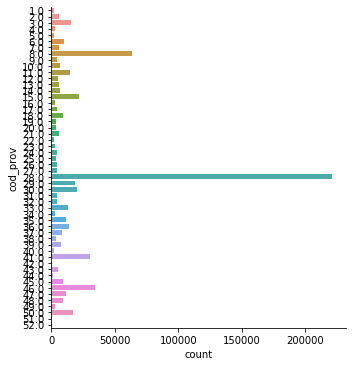

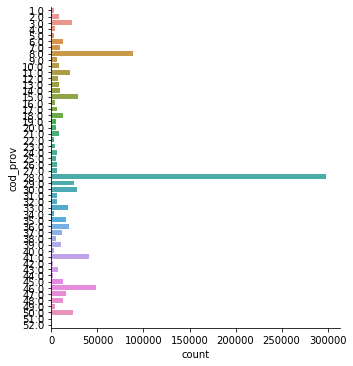

In [42]:
print(df_train['cod_prov'].value_counts())
print(df_test['cod_prov'].value_counts())
sns.catplot(data=df_train_subset, y='cod_prov', kind='count')
sns.catplot(data=df_test, y='cod_prov', kind='count')

In [49]:
print(len(df_train['cod_prov'].unique()))
print(df_train.drop_duplicates(['cod_prov', 'nomprov']).shape)
print(len(df_test['cod_prov'].unique()))
print(df_test.drop_duplicates(['cod_prov', 'nomprov']).shape)

53
(53, 48)
53
(53, 24)


- cod_provとnomprovは一意。

### ind_actividad_cliente | Activity index (1, active customer; 0, inactive customer)

In [51]:
print(df_train['ind_actividad_cliente'].value_counts())
print(df_test['ind_actividad_cliente'].value_counts())

0.0    7384390
1.0    6235185
Name: ind_actividad_cliente, dtype: int64
0.0    534276
1.0    395339
Name: ind_actividad_cliente, dtype: int64


### ranta | Gross income of the household

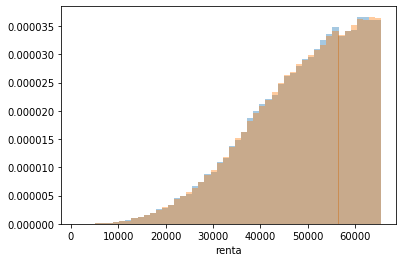

In [57]:
sns.distplot(a=df_train_subset['renta'].replace(np.inf, np.nan).dropna(), kde=False, norm_hist=True)
sns.distplot(a=df_test['renta'].replace(np.inf, np.nan).dropna(), kde=False, norm_hist=True)

- 64,000以上は打ち切って、infとしているよう。

### segmento | segmentation: 01 - VIP, 02 - Individuals 03 - college graduated

02 - PARTICULARES     7960220
03 - UNIVERSITARIO    4935579
01 - TOP               562142
Name: segmento, dtype: int64
02 - PARTICULARES     545378
03 - UNIVERSITARIO    346028
01 - TOP               35961
Name: segmento, dtype: int64


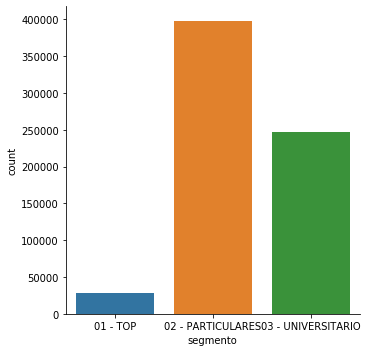

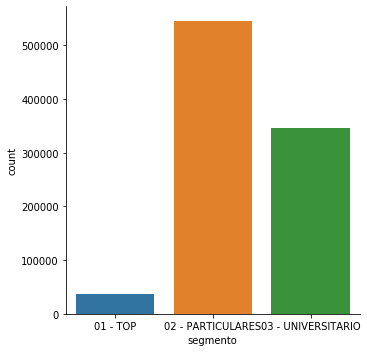

In [59]:
print(df_train['segmento'].value_counts())
print(df_test['segmento'].value_counts())
sns.catplot(data=df_train_subset, x='segmento', kind='count', order=['01 - TOP', '02 - PARTICULARES', '03 - UNIVERSITARIO'])
sns.catplot(data=df_test, x='segmento', kind='count', order=['01 - TOP', '02 - PARTICULARES', '03 - UNIVERSITARIO'])

### 商品ごとにの購入した顧客数の確認

In [134]:
# 顧客ごとのレコード数
df_train.loc[:, ['fecha_dato', 'ncodpers']].groupby('ncodpers').count().loc[:, 'fecha_dato']

ncodpers
15889      17
15890      17
15891       2
15892      17
15893      17
           ..
1553685     1
1553686     1
1553687     1
1553688     1
1553689     1
Name: fecha_dato, Length: 956645, dtype: int64

In [140]:
pd.concat([df_train.loc[:, ['ncodpers']], df_train.loc[:, 'ind_ahor_fin_ult1':'ind_recibo_ult1']], axis=1).\
astype(float).groupby('ncodpers').sum()

,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
ncodpers,,,,,,,,,,,,,,,,,,,,,,,,
15889.0,0.0,0.0,17.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,17.0,0.0,0.0,0.0,0.0
15890.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,0.0,17.0,0.0,0.0,0.0,17.0,0.0,0.0,17.0,0.0,0.0,17.0,0.0,0.0,17.0,17.0,17.0
15891.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15892.0,0.0,0.0,12.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,17.0,0.0,0.0,0.0,0.0,17.0,17.0,17.0,0.0,0.0,0.0,17.0
15893.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553685.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1553686.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1553687.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [102]:
pd.concat([df_train.loc[:, ['ncodpers']], df_train.loc[:, 'ind_ahor_fin_ult1':'ind_recibo_ult1']], axis=1).\
groupby('ncodpers').max().astype(float).sum()

ind_ahor_fin_ult1        89.0
ind_aval_fin_ult1        23.0
ind_cco_fin_ult1     622371.0
ind_cder_fin_ult1       409.0
ind_cno_fin_ult1      85259.0
ind_ctju_fin_ult1      8855.0
ind_ctma_fin_ult1     17728.0
ind_ctop_fin_ult1    108104.0
ind_ctpp_fin_ult1     37160.0
ind_deco_fin_ult1      6695.0
ind_deme_fin_ult1      1848.0
ind_dela_fin_ult1     47319.0
ind_ecue_fin_ult1     81920.0
ind_fond_fin_ult1     17339.0
ind_hip_fin_ult1       5077.0
ind_plan_fin_ult1      8063.0
ind_pres_fin_ult1      2456.0
ind_reca_fin_ult1     47560.0
ind_tjcr_fin_ult1     58701.0
ind_valo_fin_ult1     24084.0
ind_viv_fin_ult1       3268.0
ind_nomina_ult1       70356.0
ind_nom_pens_ult1     75507.0
ind_recibo_ult1      157188.0
dtype: float64

In [ ]:
- 

### 顧客ごとの購入商品数（train全期間）の分布を確認

In [113]:
num_product_per_customer = pd.concat([df_train.loc[:, ['ncodpers']], df_train.loc[:, 'ind_ahor_fin_ult1':'ind_recibo_ult1']], axis=1).\
groupby('ncodpers').max().astype(float).apply(sum, axis=1)

In [120]:
num_product_per_customer.describe()

count    953543.000000
mean          1.557831
std           1.750026
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max          15.000000
dtype: float64

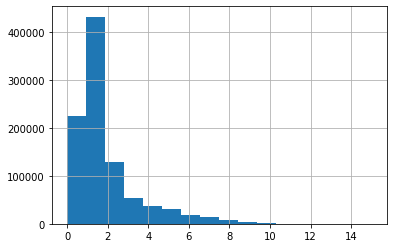

In [123]:
num_product_per_customer.hist(bins=16)

- 大体1個

## ユーザーあたりのデータがどうなっているか確認

In [68]:
df_train.query('ncodpers == 1375586')

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35.0,2015-01-12,0.0,6.0,1.0,NaN,1,A,S,N,NaN,KHL,N,1.0,29.0,MALAGA,1.0,inf,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1047196,2015-02-28,1375586,N,ES,H,35.0,2015-01-12,0.0,6.0,1.0,NaN,1,A,S,N,NaN,KHL,N,1.0,29.0,MALAGA,1.0,inf,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1681276,2015-03-28,1375586,N,ES,H,35.0,2015-01-12,0.0,6.0,1.0,NaN,1,A,S,N,NaN,KHL,N,1.0,29.0,MALAGA,1.0,inf,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
2299297,2015-04-28,1375586,N,ES,H,35.0,2015-01-12,0.0,6.0,1.0,NaN,1,A,S,N,NaN,KHL,N,1.0,29.0,MALAGA,1.0,inf,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
2714121,2015-05-28,1375586,N,ES,H,35.0,2015-01-12,0.0,6.0,1.0,NaN,1,A,S,N,NaN,KHL,N,1.0,29.0,MALAGA,1.0,inf,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1
3343336,2015-06-28,1375586,N,ES,H,35.0,2015-01-12,0.0,6.0,1.0,NaN,1,A,S,N,NaN,KHL,N,1.0,29.0,MALAGA,1.0,inf,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1
4581564,2015-07-28,1375586,N,ES,H,35.0,2015-01-12,0.0,6.0,1.0,NaN,1.0,A,S,N,NaN,KHL,N,1.0,29.0,MALAGA,1.0,inf,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1
5075380,2015-08-28,1375586,N,ES,H,36.0,2015-01-12,0.0,7.0,1.0,NaN,1.0,A,S,N,NaN,KHL,N,1.0,29.0,MALAGA,0.0,inf,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
6258167,2015-09-28,1375586,N,ES,H,36.0,2015-01-12,0.0,8.0,1.0,NaN,1.0,I,S,N,NaN,KHL,N,1.0,29.0,MALAGA,0.0,inf,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
6572487,2015-10-28,1375586,N,ES,H,36.0,2015-01-12,0.0,9.0,1.0,NaN,1.0,I,S,N,NaN,KHL,N,1.0,29.0,MALAGA,0.0,inf,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0


In [69]:
df_train.query('ncodpers == 1170544')

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
235546,2015-01-28,1170544,N,ES,H,35.0,2013-08-28,0.0,23.0,1.0,NaN,1,A,S,N,NaN,KAT,N,1.0,3.0,ALICANTE,0.0,NaN,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1
1010103,2015-02-28,1170544,N,ES,H,35.0,2013-08-28,0.0,23.0,1.0,NaN,1,A,S,N,NaN,KAT,N,1.0,3.0,ALICANTE,0.0,NaN,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1
1612348,2015-03-28,1170544,N,ES,H,35.0,2013-08-28,0.0,23.0,1.0,NaN,1,A,S,N,NaN,KAT,N,1.0,3.0,ALICANTE,0.0,NaN,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
2269158,2015-04-28,1170544,N,ES,H,35.0,2013-08-28,0.0,23.0,1.0,NaN,1,A,S,N,NaN,KAT,N,1.0,3.0,ALICANTE,0.0,NaN,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
2781589,2015-05-28,1170544,N,ES,H,35.0,2013-08-28,0.0,23.0,1.0,NaN,1,A,S,N,NaN,KAT,N,1.0,3.0,ALICANTE,0.0,NaN,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
3415166,2015-06-28,1170544,N,ES,H,35.0,2013-08-28,0.0,23.0,1.0,NaN,1,A,S,N,NaN,KAT,N,1.0,3.0,ALICANTE,0.0,NaN,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
4279467,2015-07-28,1170544,N,ES,H,35.0,2013-08-28,0.0,23.0,1.0,NaN,1,A,S,N,NaN,KAT,N,1.0,3.0,ALICANTE,0.0,NaN,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
5245288,2015-08-28,1170544,N,ES,H,35.0,2013-08-28,0.0,24.0,1.0,NaN,1,A,S,N,NaN,KAT,N,1.0,3.0,ALICANTE,0.0,NaN,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
6148557,2015-09-28,1170544,N,ES,H,35.0,2013-08-28,0.0,25.0,1.0,NaN,1,A,S,N,NaN,KAT,N,1.0,3.0,ALICANTE,0.0,NaN,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
6415485,2015-10-28,1170544,N,ES,H,35.0,2013-08-28,0.0,26.0,1.0,NaN,1,I,S,N,NaN,KAT,N,1.0,3.0,ALICANTE,0.0,NaN,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0


In [112]:
df_train.query('ncodpers == 15889')

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,ind_deme_fin_ult1,ind_dela_fin_ult1,ind_ecue_fin_ult1,ind_fond_fin_ult1,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
416965,2015-01-28,15889,F,ES,V,56.0,1995-01-16,0.0,245.0,1.0,NaN,1,A,S,N,N,KAT,N,1.0,28.0,MADRID,1.0,inf,01 - TOP,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0.0,0.0,0
836224,2015-02-28,15889,F,ES,V,56.0,1995-01-16,0.0,245.0,1.0,NaN,1,A,S,N,N,KAT,N,1.0,28.0,MADRID,1.0,inf,01 - TOP,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0.0,0.0,0
1673961,2015-03-28,15889,F,ES,V,56.0,1995-01-16,0.0,245.0,1.0,NaN,1,A,S,N,N,KAT,N,1.0,28.0,MADRID,1.0,inf,01 - TOP,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0.0,0.0,0
1882060,2015-04-28,15889,F,ES,V,56.0,1995-01-16,0.0,245.0,1.0,NaN,1,A,S,N,N,KAT,N,1.0,28.0,MADRID,1.0,inf,01 - TOP,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0.0,0.0,0
3144382,2015-05-28,15889,F,ES,V,56.0,1995-01-16,0.0,245.0,1.0,NaN,1,A,S,N,N,KAT,N,1.0,28.0,MADRID,1.0,inf,01 - TOP,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0.0,0.0,0
3565837,2015-06-28,15889,F,ES,V,56.0,1995-01-16,0.0,245.0,1.0,NaN,1,A,S,N,N,KAT,N,1.0,28.0,MADRID,1.0,inf,01 - TOP,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0.0,0.0,0
4078996,2015-07-28,15889,F,ES,V,56.0,1995-01-16,0.0,245.0,1.0,NaN,1,A,S,N,N,KAT,N,1.0,28.0,MADRID,1.0,inf,01 - TOP,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0.0,0.0,0
5319234,2015-08-28,15889,F,ES,V,56.0,1995-01-16,0.0,246.0,1.0,NaN,1,A,S,N,N,KAT,N,1.0,28.0,MADRID,1.0,inf,01 - TOP,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0.0,0.0,0
5705188,2015-09-28,15889,F,ES,V,56.0,1995-01-16,0.0,247.0,1.0,NaN,1,A,S,N,N,KAT,N,1.0,28.0,MADRID,1.0,inf,01 - TOP,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0.0,0.0,0
6973298,2015-10-28,15889,F,ES,V,56.0,1995-01-16,0.0,248.0,1.0,NaN,1,A,S,N,N,KAT,N,1.0,28.0,MADRID,1.0,inf,01 - TOP,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0.0,0.0,0


## データセット出力

In [142]:
df_products_cummax = pd.concat([df_train.loc[:, ['ncodpers']], df_train.loc[:, 'ind_ahor_fin_ult1':'ind_recibo_ult1']], axis=1).\
groupby('ncodpers').max()

In [146]:
df_products_cummax = df_products_cummax.replace(np.nan, 0)

In [152]:
df_products_cummax = df_products_cummax.astype("int8")

In [162]:
mat_procuct = df_products_cummax.values.T

with open('../model/item_user_score.dat', mode='wb') as f:
    pickle.dump(mat_procuct, f)

In [244]:
dict_customerid = {i:ncodpers for i, ncodpers in enumerate(df_products_cummax.index)}

with open('../model/dict_customerid.dat', mode='wb') as f:
    pickle.dump(dict_customerid, f)

In [235]:
dict_itemname = {i:item for i, item in enumerate(df_products_cummax.columns)}

with open('../model/dict_itemname.dat', mode='wb') as f:
    pickle.dump(dict_itemname, f)